# Introduction 

In the following notebook, I will be exploring a cleaned version of the energy_dataset.csv file.

* Raw data can be found [here](https://github.com/KishenSharma6/Weather-Energy-Consumption-in-Spain/tree/master/Data/01_Raw_Data)
* Cleaned data can be found [here](https://github.com/KishenSharma6/Weather-Energy-Consumption-in-Spain/tree/master/Data/02_Cleaned_Data)

**Read in libraries for notebook**

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Set notebook preferences**

In [116]:
#Set preferences for pandas 
pd.set_option("display.max_rows", 101)

#Set style for visualizations
plt.style.use('Solarize_Light2')

**Read in data**

In [23]:
#Set path to raw data
path = r'C:\Users\kishe\Documents\Data Science\Projects\Python Projects\In Progress\Spain Hourly Energy Demand and Weather'

#Read in raw data
df = pd.read_csv(path + '/Data/02_Cleaned_Data/2020_0505_Cleaned_Energy_Dataset.csv', index_col='date_time')

# Data Overview

* time: Datetime index localized to CET
* total load forecast: forecasted electrical demand
* total load actual: actual electrical demand
* price day ahead: forecasted price EUR/MWh
* price actual: price in EUR/MWh
* **date**: mm/dd/yyyy
* **time**: time of recording
* **weekday**: day of recording
* **month**: month of recording
* **year**: year of recording

**Data Preview**

In [24]:
#Print df shape
print('Shape of data:', df.shape)

#View head and data info
display(df.head())

Shape of data: (35064, 9)


,total_load_forecast,total_load_actual,price_day_ahead,price_actual,date,time,weekday,month,year
date_time,,,,,,,,,
2015-01-01 00:00:00,26118.0,25385.0,50.10,65.41,2015-01-01,00:00:00,Thursday,January,2015
2015-01-01 01:00:00,24934.0,24382.0,48.10,64.92,2015-01-01,01:00:00,Thursday,January,2015
2015-01-01 02:00:00,23515.0,22734.0,47.33,64.48,2015-01-01,02:00:00,Thursday,January,2015
2015-01-01 03:00:00,22642.0,21286.0,42.27,59.32,2015-01-01,03:00:00,Thursday,January,2015
2015-01-01 04:00:00,21785.0,20264.0,38.41,56.04,2015-01-01,04:00:00,Thursday,January,2015


**About the Data**

In [25]:
print('Data set stats and info:\n{}\n'.format(df.describe()))
print(df.info())

Data set stats and info:
       total_load_forecast  total_load_actual  price_day_ahead  price_actual  \
count         35064.000000       35064.000000     35064.000000  35064.000000   
mean          28712.129962       28697.608573        49.874341     57.884023   
std            4594.100854        4575.872425        14.618900     14.204083   
min           18105.000000       18041.000000         2.060000      9.330000   
25%           24793.750000       24806.750000        41.490000     49.347500   
50%           28906.000000       28902.000000        50.520000     58.020000   
75%           32263.250000       32194.250000        60.530000     68.010000   
max           41390.000000       41015.000000       101.990000    116.800000   

               year  
count  35064.000000  
mean    2016.499658  
std        1.117744  
min     2015.000000  
25%     2016.000000  
50%     2016.000000  
75%     2017.000000  
max     2018.000000  

<class 'pandas.core.frame.DataFrame'>
Index: 35064 entr

**Target distributions**

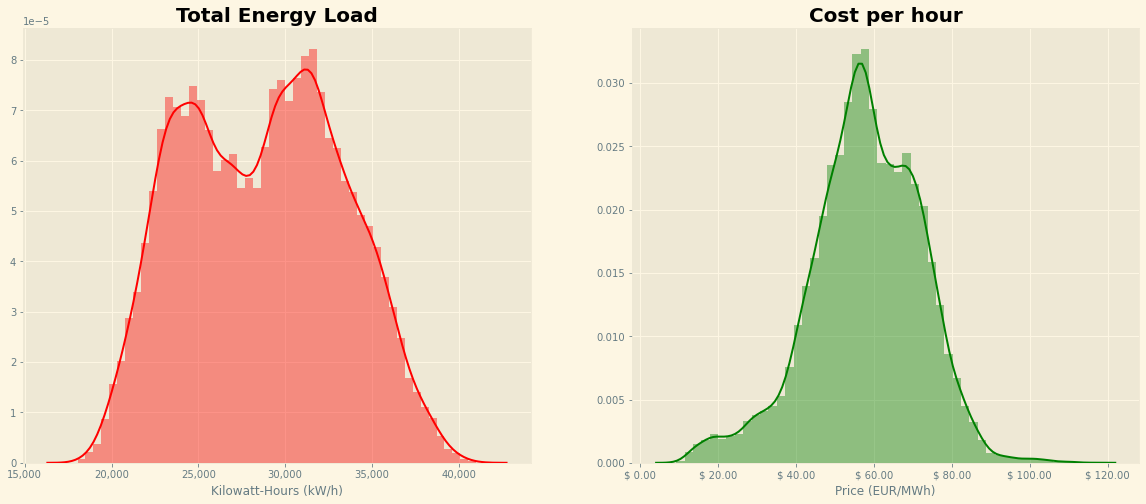

In [52]:
#Set plot
f, axes = plt.subplots(1,2, figsize = (20,8))

#Plot data
g = sns.distplot(df['total_load_actual'], ax = axes[0], color = 'r', bins=50)
j = sns.distplot(df['price_actual'], ax = axes[1],color = 'g', bins=50)

###Set plot aesthetics###
##plot 1##
#Title
g.set_title('Total Energy Load', fontweight = 'bold', fontsize = 20)

#Axes
g.set_xlabel('Kilowatt-Hours (kW/h)')
g.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

##plot 2##
#Title
j.set_title('Cost per hour', fontweight = 'bold', fontsize = 20)

#Axes
j.set_xlabel('Price (EUR/MWh)')
j.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "$ {:}.00".format(int(x))))

# Exploratory Data Analysis

## Total Energy Load

**Raw Time Plot**

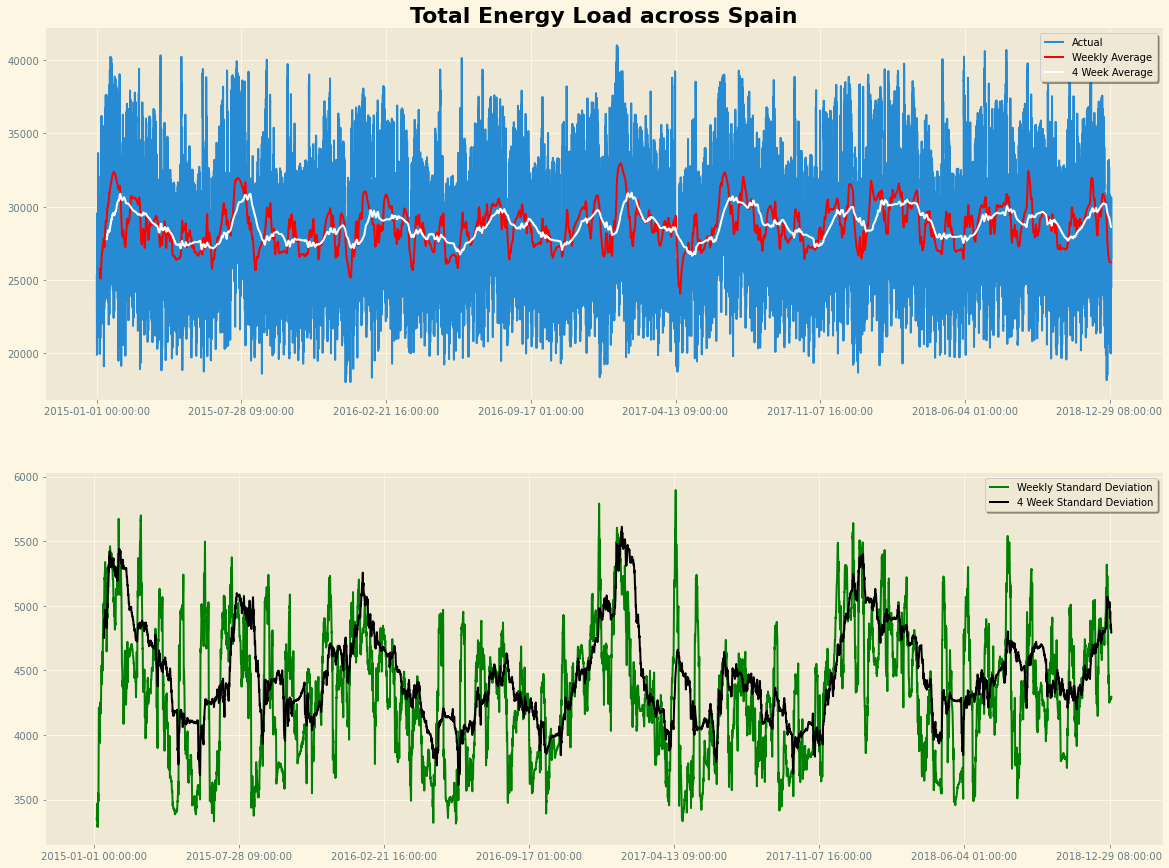

In [114]:
#Set figure
fig, ax = plt.subplots(2,1, figsize = (20,15))

#Plot data
df['total_load_actual'].plot(ax=ax[0], label = 'Actual', )
df['total_load_actual'].rolling(24*7,24*4).mean().plot(ax=ax[0],color = 'r',label = 'Weekly Average')
df['total_load_actual'].rolling(24*7*4,24*7*2).mean().plot(ax=ax[0],color = 'white',label = '4 Week Average')

df['total_load_actual'].rolling(24*7,24*4).std().plot(ax=ax[1],color = 'g',label = 'Weekly Standard Deviation')
df['total_load_actual'].rolling(24*7*4,24*7*2).std().plot(ax=ax[1],color = 'black',label = '4 Week Standard Deviation')


###Set plot aesthetics###
#Plot 1
ax[0].set_title('Total Energy Load across Spain',fontsize = 22, fontweight = 'bold')
ax[0].set_xlabel('')
ax[0].legend(fancybox = True, shadow = True, frameon = True)


#Plot 2
ax[1].set_title('')
ax[1].set_xlabel('')
ax[1].legend(fancybox = True, shadow = True, frameon = True)


**Autocorrelation Plot**

Text(0.5, 1.0, 'Total Energy Load Autocorrelation')

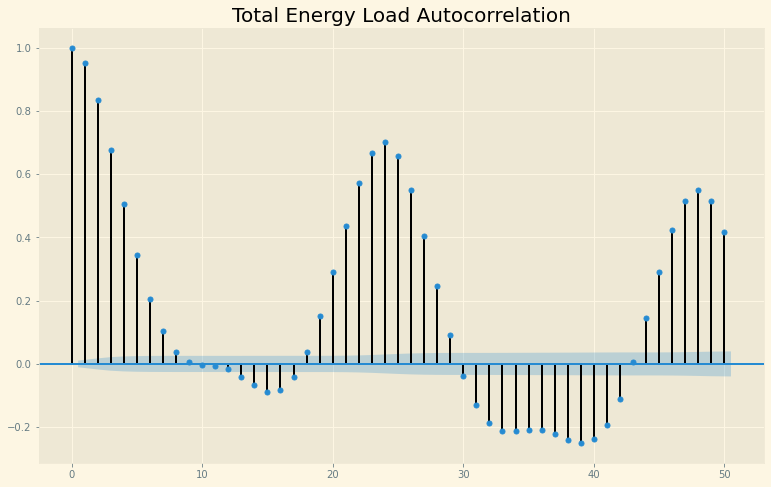

In [60]:
#Import plot acf
from statsmodels.graphics.tsaplots import plot_acf

#Set plot
f, ax = plt.subplots(figsize = (13,8))

#Fit to data
plot_acf(df['total_load_actual'], lags = 50, ax = ax),

###Set plot aesthetics###
#Title
ax.set_title('Total Energy Load Autocorrelation', fontsize = 20)

**View Seasonality at 24 hrs**

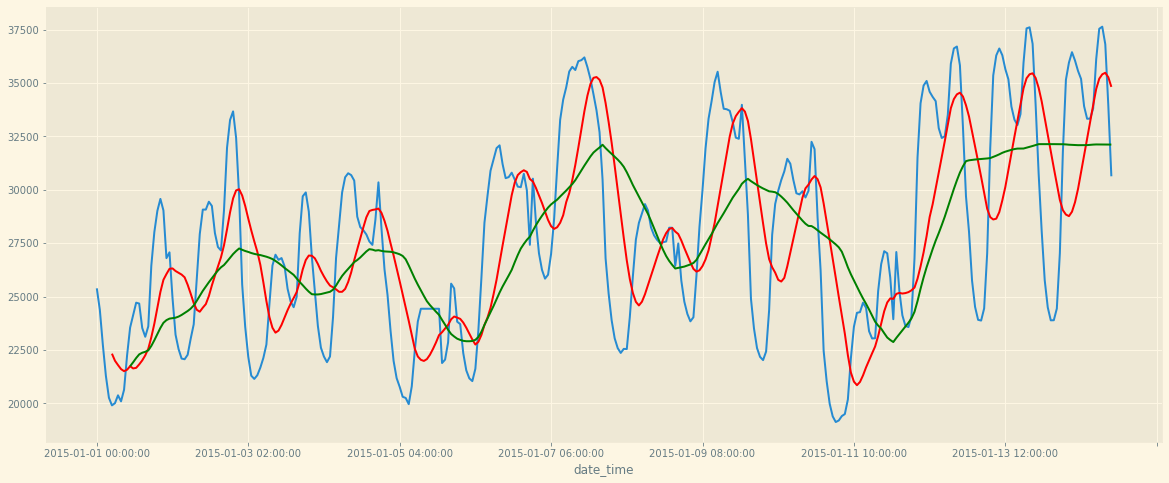

In [97]:
#Set plot
f, ax = plt.subplots(figsize = (20,8))

#Plot 2 weeks
df['total_load_actual'][:24*7*2].plot(ax=ax)
df['total_load_actual'][:24*7*2].rolling(12, 6).mean().plot(ax=ax, color = 'r') #12 hours
df['total_load_actual'][:24*7*2].rolling(24, 12).mean().plot(ax=ax, color = 'g')



Seasonality by year

In [104]:
df.head()

,total_load_forecast,total_load_actual,price_day_ahead,price_actual,date,time,weekday,month,year
date_time,,,,,,,,,
2015-01-01 00:00:00,26118.0,25385.0,50.10,65.41,2015-01-01,00:00:00,Thursday,January,2015
2015-01-01 01:00:00,24934.0,24382.0,48.10,64.92,2015-01-01,01:00:00,Thursday,January,2015
2015-01-01 02:00:00,23515.0,22734.0,47.33,64.48,2015-01-01,02:00:00,Thursday,January,2015
2015-01-01 03:00:00,22642.0,21286.0,42.27,59.32,2015-01-01,03:00:00,Thursday,January,2015
2015-01-01 04:00:00,21785.0,20264.0,38.41,56.04,2015-01-01,04:00:00,Thursday,January,2015


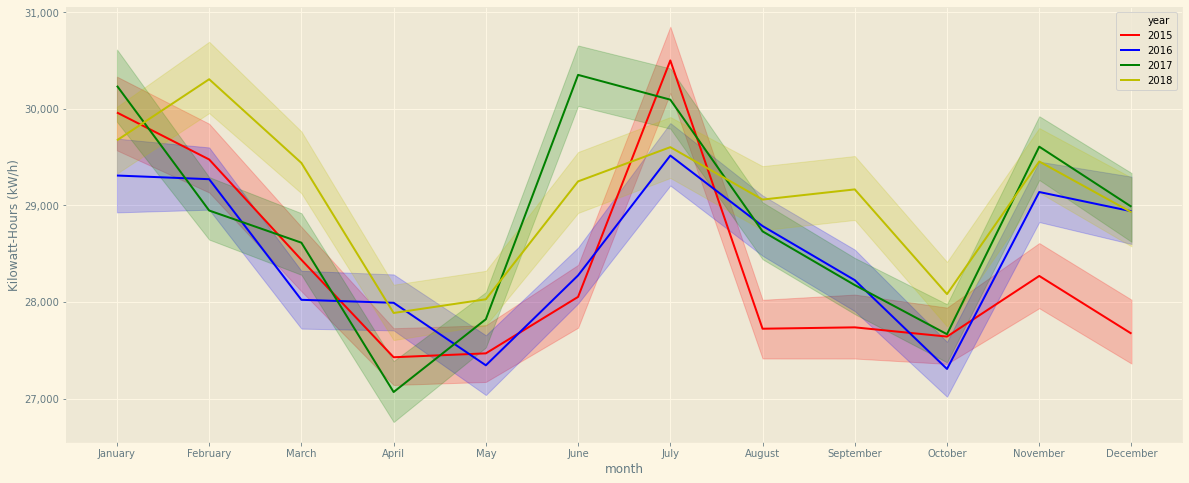

In [110]:
#Set plot
f, ax = plt.subplots(figsize = (20,8))

#Set colors for hue
colors = ['r','b','g','y']

#Plot Data
g = sns.lineplot(x = 'month', y = 'total_load_actual', hue = 'year',data = df, 
             sort = False,palette=colors, ax = ax);

#Axes
g.set_ylabel('Kilowatt-Hours (kW/h)')
g.get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

#

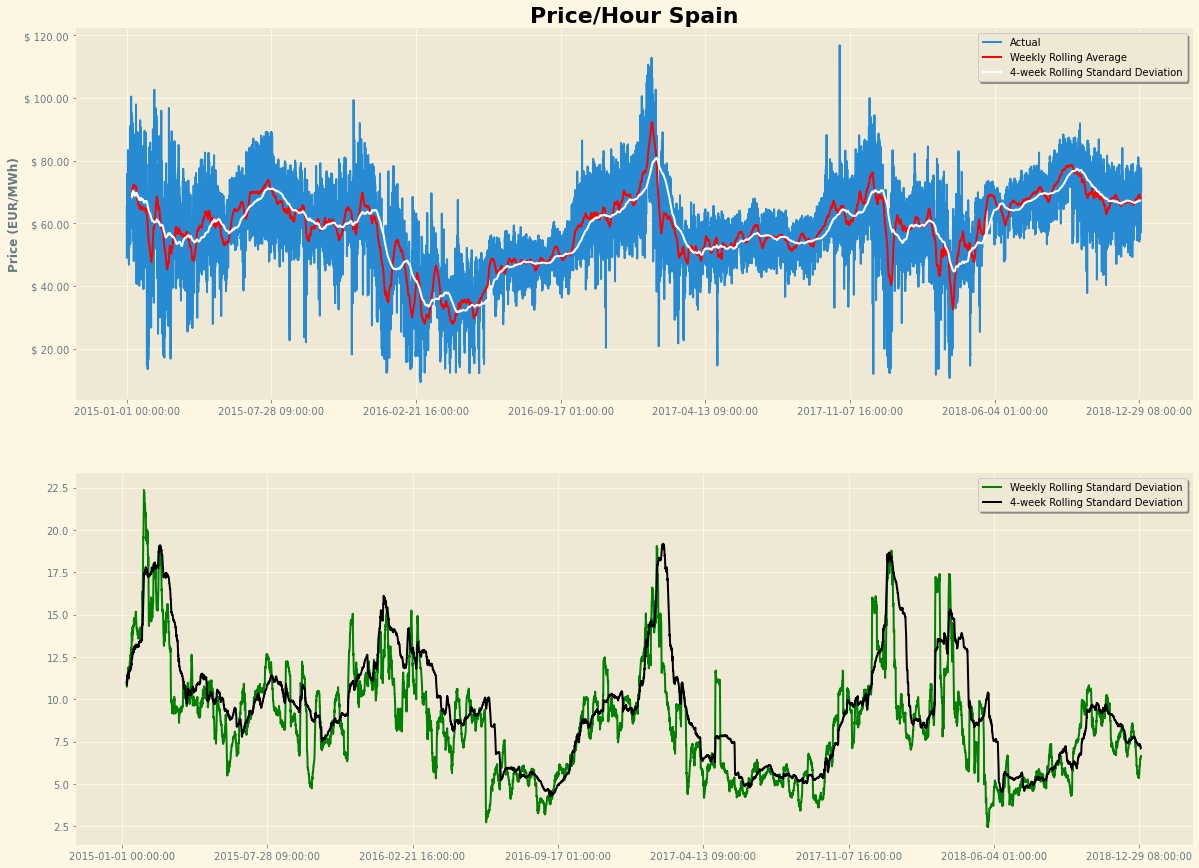

In [115]:
#Set figure
fig, ax = plt.subplots(2,1, figsize = (20,15))

#Plot Data
df['price_actual'].plot(ax =ax[0], label = 'Actual')
df['price_actual'].rolling(24*7,24*7).mean().plot(ax =ax[0],color = 'r', label = 'Weekly Rolling Average')
df['price_actual'].rolling(24*7*4,24*7).mean().plot(ax =ax[0], color = 'w', label = '4-week Rolling Standard Deviation')

df['price_actual'].rolling(24*7,24*7).std().plot(ax =ax[1], color = 'g', label = 'Weekly Rolling Standard Deviation')
df['price_actual'].rolling(24*7*4,24*7).std().plot(ax =ax[1], color = 'black', label = '4-week Rolling Standard Deviation')

###Set plot aesthetics###
#Plot 1
ax[0].set_title('Price/Hour Spain',fontsize = 22, fontweight = 'bold')

ax[0].set_xlabel('')
ax[0].set_ylabel('Price (EUR/MWh)', fontweight = 'bold')
ax[0].get_yaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "$ {:}.00".format(int(x))))
ax[0].legend(fancybox = True, shadow = True, frameon = True)

#Plot 2
ax[1].set_title('')

ax[1].set_xlabel('')

ax[1].legend(fancybox = True, shadow = True, frameon = True)